In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import wilcoxon, mannwhitneyu

In [2]:
cutoff = 2
order = ['Memory B',  'Naive B cell','CD8 central memory','Plasma','Mono', 'CD8 effector', 'CD8 effector memory', 'Tregs','Naive CD4','Naive CD8',
        'CD4 effector memory']
file = 'foreditorppt/task2_pretx_changelabelled.txt'
data = pd.read_csv(file, sep='\t', index_col=0)
df = pd.DataFrame(data)

In [3]:
conditions = [(df['Toxicity'] <= cutoff), (df['Toxicity'] > cutoff)]
values = ['toxicity <= ' + str(cutoff), 'toxicity > ' + str(cutoff)]
df['Toxic'] = np.select(conditions, values)
df

,Eosinophil,Erythrocyte,Macs_M0,Macs_M1,Macs_M2,Megakaryocyte,Mono,NK,Naive CD4,Naive CD8,...,CD4 effector memory,CD8 central memory,CD8 effector,CD8 effector memory,iDC,Memory B cell,mDC,Naive B cell,Toxicity,Toxic
Mixture,,,,,,,,,,,,,,,,,,,,,
tot-YUPRAF_19-3925-cfDNA,0.074498,0.066531,0.036577,0.044414,0.032557,0.078836,0.056628,0.041966,0.022621,0.020296,...,0.028840,0.023787,0.024324,0.031087,0.042787,0.020717,0.041132,0.032623,1,toxicity <= 2
tot-YUTAUR_19-3926-cfDNA,0.047686,0.074109,0.032133,0.028729,0.028973,0.091935,0.042271,0.038487,0.027399,0.012229,...,0.020663,0.015800,0.010035,0.026756,0.033291,0.045697,0.019908,0.031558,3,toxicity > 2
tot-YUTHEA_20-4000-cfDNA,0.055521,0.115136,0.035011,0.039618,0.031698,0.139834,0.034440,0.035204,0.020802,0.015957,...,0.015984,0.033990,0.021578,0.011892,0.033884,0.018097,0.032866,0.026335,1,toxicity <= 2
Y-3674-cfDNA,0.046662,0.066936,0.032497,0.023546,0.025673,0.103018,0.022150,0.038874,0.018915,0.007695,...,0.003484,0.012188,0.012681,0.001037,0.033458,0.027654,0.009474,0.037750,0,toxicity <= 2
Y-3688-cfDNA,0.042208,0.114403,0.051025,0.064132,0.040406,0.100405,0.032233,0.038541,0.029188,0.015507,...,0.018895,0.028700,0.023186,0.017554,0.041576,0.020804,0.033063,0.028505,3,toxicity > 2
Y-3703-cfDNA,0.055774,0.107653,0.035101,0.019269,0.037810,0.149276,0.048074,0.049030,0.029233,0.015715,...,0.019675,0.025123,0.049712,0.009202,0.025938,0.019597,0.031700,0.000000,3,toxicity > 2
Y-3707-cfDNA,0.038123,0.123476,0.027200,0.033429,0.039456,0.198160,0.030715,0.049326,0.032789,0.042704,...,0.017536,0.032336,0.034625,0.000000,0.039218,0.010437,0.014048,0.004404,0,toxicity <= 2
Y-3715-cfDNA,0.042338,0.075726,0.031934,0.046949,0.031801,0.073712,0.047820,0.039112,0.021753,0.026649,...,0.030448,0.022761,0.005018,0.011383,0.030726,0.025855,0.010422,0.010219,3,toxicity > 2
Y-3814-cfDNA,0.023978,0.132162,0.039438,0.045420,0.029626,0.098891,0.080377,0.040567,0.023881,0.006759,...,0.008557,0.010021,0.019951,0.023524,0.047540,0.039490,0.027668,0.009271,2,toxicity <= 2


In [4]:
p_vals = {}
for cell in order:
    p_val_list = []
    if cell not in ['Toxicity', 'Toxic']:
        multi = 1
        for i, toxicity in enumerate(values):
            y = np.array(df[df['Toxic'] == toxicity][cell])
            p_val_list.append(y)
        if np.median(p_val_list[0]) >= np.median(p_val_list[1]):
            multi = -1
        p_vals[cell] = -np.log10(mannwhitneyu(p_val_list[0], p_val_list[1], alternative='two-sided')[1]) * multi
        
p_vals

{'Memory B cell': -0.2878861471679597,
 'Naive B cell': -0.2869355208157593,
 'CD8 central memory': -0.020901906350527823,
 'Plasma': 0.1144814877985627,
 'Mono': -0.4239362286819658,
 'CD8 effector': -0.0,
 'CD8 effector memory': 0.22507852703824652,
 'Tregs': 0.020901906350527823,
 'Naive CD4': 0.4239362286819658,
 'Naive CD8': 0.4239362286819658,
 'CD4 effector memory': 1.6664264506240625}

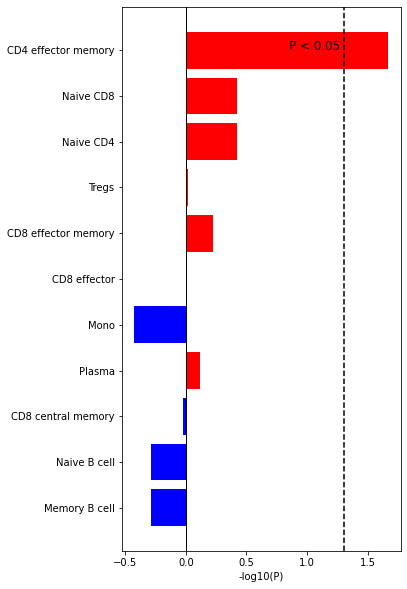

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(5, 10))
for cell in order:
    y = p_vals[cell]
    if y <= 0:
        ax.barh(cell, y, color='b')
    else:
        ax.barh(cell, y, color='r')
        
ax.axvline(linewidth=1, color='k')
ax.axvline(x=-np.log10(0.05), linewidth=1.5, color='k', ls='--')
ax.annotate('P < 0.05', (0.85, 10), fontsize=12)
ax.set_xlabel('-log10(P)')
plt.savefig(file+'_cutoff_'+str(cutoff)+'_toxicity_barplot.pdf', bbox_inches='tight')